In [1]:
import habitat

import numpy as np
import random

%matplotlib inline
import matplotlib.pyplot as plt

# Scene semantic annotations

In [2]:
def print_scene_recur(scene):
    for level in scene.levels:
        print(
            f"Level id:{level.id}, center:{level.aabb.center},"
            f" dims:{level.aabb.sizes}"
        )
        for region in level.regions:
            print(
                f"Region id:{region.id}, category:{region.category.name()},"
                f" center:{region.aabb.center}, dims:{region.aabb.sizes}"
            )
            for obj in region.objects:
                print(
                    f"Object id:{obj.id}, category:{obj.category.name()},"
                    f" center:{obj.aabb.center}, dims:{obj.aabb.sizes}"
                )

In [3]:
"""
Habitat-API
All the boilerplate code in the habitat-sim to set sensor config 
and agent config is abstracted out in the Habitat-API config system.
Default config is at habitat/config/default.py. 
You can override defaults in a separate file and pass it to the get_config function.
"""

config = habitat.get_config(config_paths='../configs/tasks/pointnav_mp3d.yaml')
config.defrost()
config.DATASET.POINTNAVV1.DATA_PATH = '../data/datasets/pointnav/mp3d/v1/val/val.json.gz'
config.DATASET.SCENES_DIR = '../data/scene_datasets/'
config.freeze()

env = habitat.Env(config=config)

# Print semantic annotation information (id, category, bounding box details) 
# for the current scene in a hierarchical fashion

scene = env.sim.semantic_annotations()
print_scene_recur(scene)
    
env.close() 

# Note: Since only one OpenGL is allowed per process, 
# you have to close the current env before instantiating a new one.

2019-06-05 19:33:24,528 initializing sim Sim-v0
2019-06-05 19:33:35,561 initializing task Nav-v0


Level id:0, center:[11.0210495  3.996935   3.3452997], dims:[ 43.0625    8.19569 -30.1122 ]
Region id:0_0, category:rec/game, center:[16.61225    2.7802274 11.577564 ], dims:[10.364299   5.5838847 -4.14447  ]
Object id:0_0_0, category:ceiling, center:[16.5905   4.54488 11.269  ], dims:[9.984315  4.0917997 2.1377602]
Object id:0_0_1, category:wall, center:[16.5865     2.6818905 13.4147   ], dims:[9.69278   0.5280709 5.4398193]
Object id:0_0_2, category:wall, center:[21.6013     1.7400599 11.3493   ], dims:[3.5423203  0.41668844 3.921341  ]
Object id:0_0_3, category:door, center:[11.5374     1.2431393 10.386599 ], dims:[1.2573967  2.5311599  0.41445923]
Object id:0_0_4, category:door, center:[20.6332     1.2136002 13.5958   ], dims:[0.15834427 2.4860601  1.1674671 ]
Object id:0_0_5, category:wall, center:[16.5946    2.66614   9.331001], dims:[9.72554    0.23693037 5.3787804 ]
Object id:0_0_6, category:window, center:[16.5822    2.852209 13.596898], dims:[1.5934639  0.16375065 1.2588081 ]

Object id:0_15_503, category:clothes, center:[28.3495      0.94415593 -2.07855   ], dims:[0.5522957  0.639388   0.38956213]
Object id:0_15_504, category:floor, center:[28.7638     -0.06490624 -1.983     ], dims:[0.04683304 1.7440803  2.8958402 ]
Object id:0_15_505, category:curtain, center:[29.039      1.8226302 -3.2488794], dims:[0.57595825 1.7158961  1.6039839 ]
Object id:0_15_506, category:wall, center:[28.8266      1.30017    -0.56094396], dims:[0.08927155 2.75274    1.7510803 ]
Object id:0_15_507, category:wall, center:[30.1102     2.4225798 -1.97719  ], dims:[0.48261642 0.20436811 2.84414   ]
Object id:0_15_508, category:wall, center:[29.8886     1.3454404 -3.1992698], dims:[0.35998535 1.867578   0.46655416]
Object id:0_15_509, category:clothes, center:[29.8497     1.1963701 -2.11089  ], dims:[0.5786133  1.7731423  0.68771255]
Object id:0_15_510, category:clothes, center:[28.5502     1.5734401 -1.8682199], dims:[0.19013596 1.466568   0.433962  ]
Object id:0_15_511, category:objec

# Take random actions and display sensor data

In [4]:
from PIL import Image
from habitat_sim.utils import d3_40_colors_rgb
import numpy as np

def display_sample(rgb_obs, semantic_obs, depth_obs):
    rgb_img = Image.fromarray(rgb_obs, mode="RGB")
    
    semantic_img = Image.new("P", (semantic_obs.shape[1], semantic_obs.shape[0]))
    semantic_img.putpalette(d3_40_colors_rgb.flatten())
    semantic_img.putdata((semantic_obs.flatten() % 40).astype(np.uint8))
    semantic_img = semantic_img.convert("RGBA")
    
    depth_img = Image.fromarray((depth_obs / 10 * 255).astype(np.uint8), mode="L")

    arr = [rgb_img, semantic_img, depth_img]
    
    
    titles = ['rgb', 'semantic', 'depth']
    plt.figure(figsize=(12 ,8))
    for i, data in enumerate(arr):
        ax = plt.subplot(1, 3, i+1)
        ax.axis('off')
        ax.set_title(titles[i])
        plt.imshow(data)
    plt.show()

2019-06-05 19:33:36,027 initializing sim Sim-v0
2019-06-05 19:33:46,269 initializing task Nav-v0


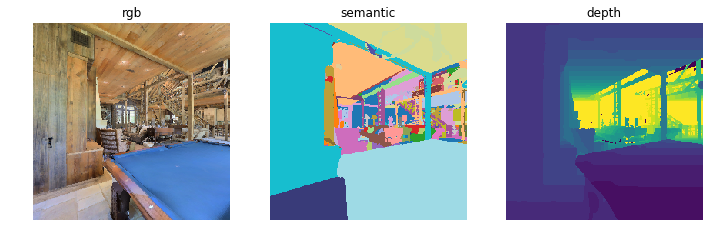

look down


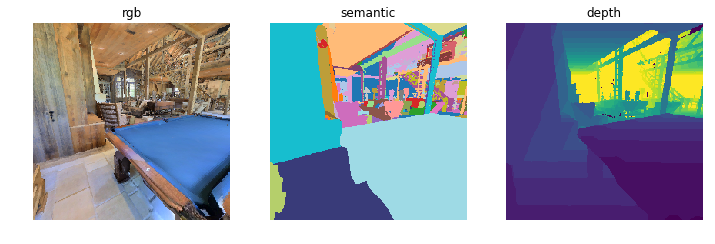

turn left


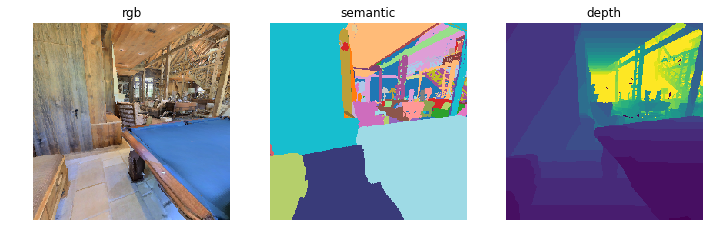

move_forward


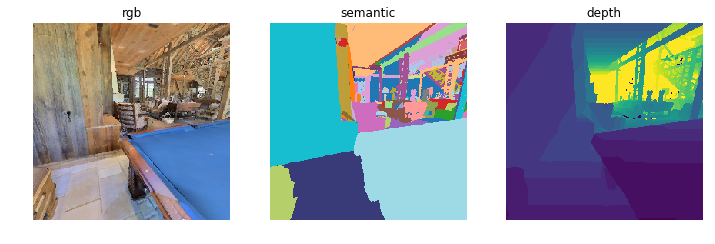

stop


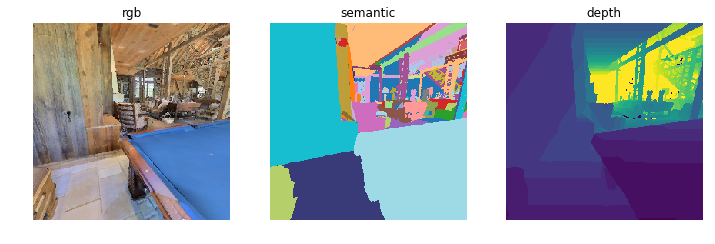

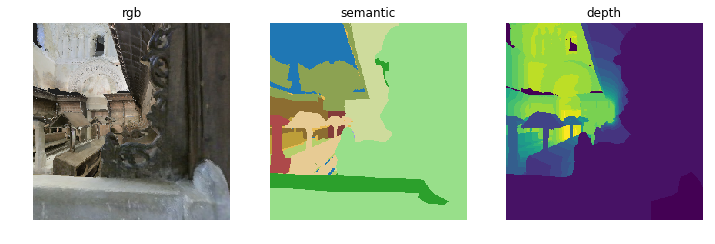

look up


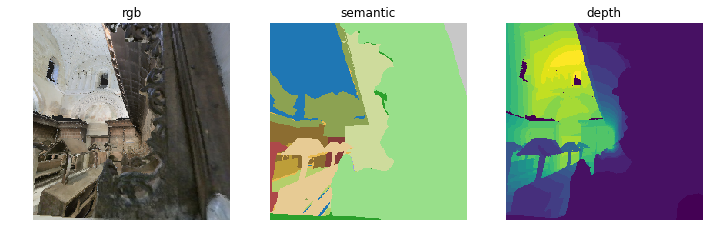

look down


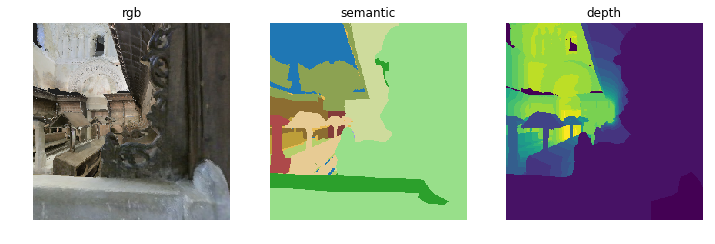

stop


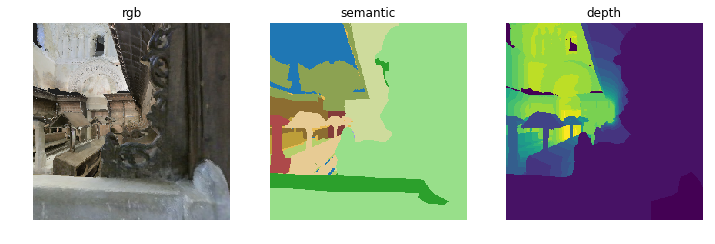

In [5]:
config = habitat.get_config(config_paths='../configs/tasks/pointnav_mp3d.yaml')
config.defrost()
config.DATASET.POINTNAVV1.DATA_PATH = '../data/datasets/pointnav/mp3d/v1/val/val.json.gz'
config.DATASET.SCENES_DIR = '../data/scene_datasets/'
config.freeze()

env = habitat.Env(config=config)
env.episodes = random.sample(env.episodes, 2)

max_steps = 4

action_mapping = {
    0: 'stop',
    1: 'move_forward',
    2: 'turn left',
    3: 'turn right',
    4: 'look up',
    5: 'look down'
}

for i in range(len(env.episodes)):
    observations = env.reset()
    
    display_sample(observations['rgb'], observations['semantic'], np.squeeze(observations['depth']))
    
    count_steps = 0
    while count_steps < max_steps:
        action = random.choice(list(action_mapping.keys()))
        print(action_mapping[action])
        observations = env.step(action)
        display_sample(observations['rgb'], observations['semantic'], np.squeeze(observations['depth']))

        count_steps += 1
        if env.episode_over:
            break
        
env.close()